#### MODEL XGBoost

##### IMPORT DES BIBLIOTHEQUES

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Dataframe

In [18]:
df = pd.read_csv("./../datasets/train.csv")

In [19]:
df = df.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)

##### SEPARATION DES COLONNES NUMERIQUES ET CATEGORIELLES

In [20]:
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df.select_dtypes(include=np.number).columns

##### Séparation X / y

In [21]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

##### ENCODAGE DES VARIABLES CATEGORIELLES

In [22]:
X = pd.get_dummies(X, columns=cat_vars, drop_first=True) # One hot encoding

##### Train / Test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

##### Modèle XGBoost

In [24]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

In [25]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

##### Evaluation du modèle

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24764,  1259],
       [ 3154,  3830]])

In [27]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.75      0.55      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

ROC-AUC : 0.8903399496277833


##### Le dataset présente un déséquilibre de classes avec environ 79% de clients non churn et 21% de churn. Ce déséquilibre justifie l’utilisation de métriques adaptées comme ROC-AUC et F1-score plutôt que l’accuracy seule.

##### Importance des variables selon XGBoost

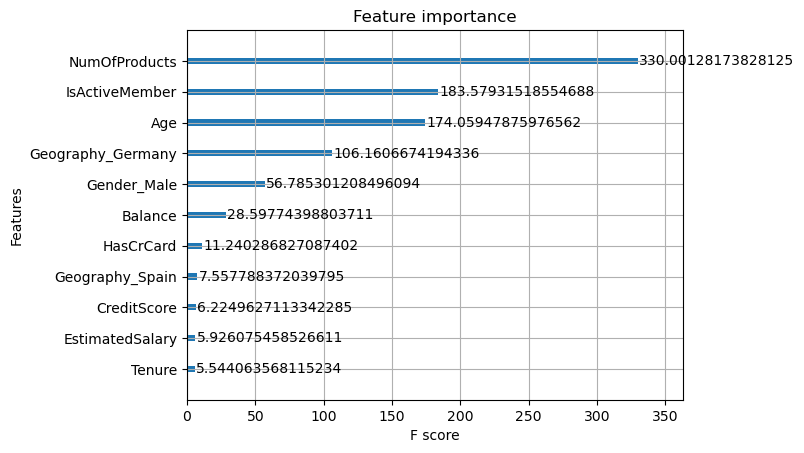

In [28]:
import xgboost as xgb

xgb.plot_importance(model, importance_type="gain")
plt.show()

##### DataFrame de comparaison du reel vs predit

In [31]:
summary = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred,
    "y_proba": y_proba
})

In [32]:
summary

,y_true,y_pred,y_proba
0,0,0,0.084922
1,1,1,0.789310
2,0,0,0.018045
3,0,0,0.342284
4,0,0,0.122850
...,...,...,...
33002,0,0,0.202121
33003,0,0,0.011122
33004,0,0,0.040906
33005,0,0,0.006468
